# Deep Learning practical advice
This notebook Will be used to show how to create a neural network using Keras. This code will then transported into a Python script, which will be deployed using a Docker container.

## Make a model
We will build a simple nueral network following the Keras API. We will use the Sequential API to create a sequential model. More details can be followed in HOML (Aurélien Géron).

You need a conda environment:
- conda create --name deep-learning-env
- conda activate deep-learning-env
- conda install -c conda-forge tensorflow

Afterwards you can write these requirements to a file: 
- conda env export -n deep-learning-env -f requirements.txt

Reload from this file:
- ...


In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

2023-03-17 14:14:34.301237: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.11.0'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
#size of the dataset:
X_train_full.shape

(60000, 28, 28)

So the images are stores as 28 by 28 matrices. reshaping them to 1 by 784 will be done later. You could also use a convolutional neural network (noty in scope here).

In [4]:
#size of the dataset:
X_train_full.dtype

dtype('uint8')

In [5]:
# creating a validation set, because it is not given:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] / 255.0, y_train_full[5000:] / 255.0
X_test = X_test / 255.0 

In [6]:
class_names = ["tshirt", "trouser", "pullover", "dress", "coat", "sandal",
                "shirt", "sneaker", "bag", "ankle boot"]

### Building the neural network!

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) #10 classes of output!

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2023-03-17 14:14:40.170129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


To inspect the model: 

In [8]:
model.layers
weights, biases = model.layers[1].get_weights()
weights.shape
#biases.shape

(784, 300)

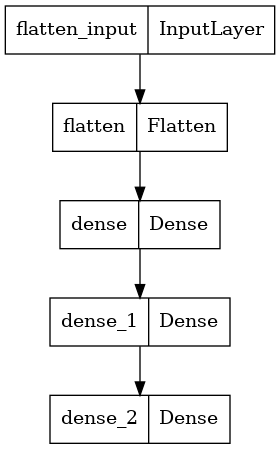

In [9]:
keras.utils.plot_model(model)

### Compiling
Compile: specify the loss function and the optimizer to use.

LOSS FUNCTIONS:
More on the losses functions: http://keras.io/losses/
- sparse categorical crossentropy: https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class: use this when there are more than 2 classes. If we had one-hot vectors, yous hould use categorical crossentropy.
- cross-entropy is actually using the maximum likelihood estimation of the probability distribution. The two are the same in this case: https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/#:~:text=Cross%2Dentropy%20and%20mean%20squared,when%20training%20neural%20network%20models.
- The cost function should put all good and bad aspects of a prediction in a single number. This is no trivial task.

OPTIMIZERS: 
This provides alternatives (https://keras.io/api/optimizers/) to the classical Gradient Descent:
- momentum optimization
- Nesterov accelerated gradient descent
- AdaGrad
- RMSprop
- Adam - very often used in deep learning
- Nadam

METRICS: https://keras.io/api/metrics/ - metrics are used to evaluate the performance of the model. They are not used to train the model, that is done with the loss function.More than one metric can be used.
- accuracy: https://keras.io/api/metrics/
- AUC / ROC: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
- MSE, MAE: https://en.wikipedia.org/wiki/Mean_absolute_error
- ...

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Typical loss functions:
- Regression: Mean Squared Error MSE
- Binary classification: Cross Entropy, also referred to as Log Loss. Use a sigmoid activation function in the last layer.
- multiclass classification: Cross Entropy, also referred to as Log Loss. Use the softmax actiovation function in the last layer

More info cross entropy: https://en.wikipedia.org/wiki/Cross_entropy

## Training the model

Epochs: a full pass over the training set. 30 - 100 is standard

In [11]:
history = model.fit(X_train,y_train, epochs=3, validation_data=(X_valid,y_valid))

Epoch 1/3


2023-03-17 14:14:41.165529: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 19s 10ms/step - loss: 0.0027 - accuracy: 0.1007 - val_loss: 3.9553e-08 - val_accuracy: 0.0914
Epoch 2/3
1719/1719 [==============================] - 20s 12ms/step - loss: 6.5156e-08 - accuracy: 0.1008 - val_loss: 1.5497e-09 - val_accuracy: 0.0914
Epoch 3/3
1719/1719 [==============================] - 19s 11ms/step - loss: 1.3632e-08 - accuracy: 0.1008 - val_loss: 5.2452e-10 - val_accuracy: 0.0914


You can use the history object to plot the resulting graph, this is insightfull of how well the model works:

AttributeError: module 'matplotlib' has no attribute 'show'

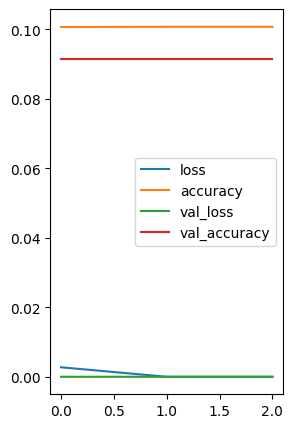

In [14]:
import pandas as pd
import matplotlib as plt

#this code is outdated and will be removed in the future. Use Seaborn instead.
pd.DataFrame(history.history).plot(figsize=(3,5))
#plt.grid(True)
#plt.gca().setylim(0,1)
plt.show()

### Saving a trained model to disk:

In [ ]:
model_save_location = "deep_learning/Sequential_DNN_1.h5"
model.save(model_save_location)

### Loading a model from disk:

In [ ]:
model2 = keras.models.load_model('deep_learning/Sequential_DNN_1.h5')